## Нейронные сети в прогнозировании временных рядов


Временные ряды https://github.com/alsu124/DA_NEW/tree/master/Lections/Time_series_lection_1

https://www.youtube.com/watch?v=u433nrxdf5k&t=141s#


https://www.youtube.com/watch?v=oMatzWuAo2g&list=PLJOzdkh8T5krxc4HsHbB8g8f0hu7973fK&index=14


In [1]:
import numpy
import pandas as pd

In [2]:
# Импорт matplotlib

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [85]:
# Импорт обучающей выборки
sales = pd.read_csv(r'monthly-car-sales-in-quebec-1960.csv', sep=';', header=0, parse_dates=[0])


In [86]:
print(min(sales['Monthly car sales in Quebec 1960-1968']))
print(max(sales['Monthly car sales in Quebec 1960-1968']))

5568
26099


In [87]:
for i in range(0,len(sales)):
    if 8000 < sales['Monthly car sales in Quebec 1960-1968'][i] < 20000:
        continue
    else:
        sales = sales.drop(i)

In [88]:
#  Знакомимся с данными
sales.shape

(82, 2)

In [89]:
#  Знакомимся с данными
sales.tail()

,Month,Monthly car sales in Quebec 1960-1968
102,1968-07-01,18024
103,1968-08-01,16722
104,1968-09-01,14385
106,1968-11-01,17180
107,1968-12-01,14577


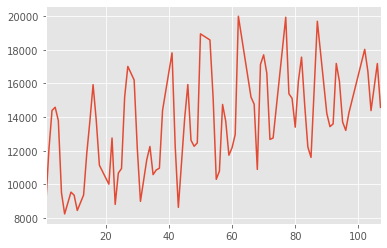

In [90]:
#  График, чтобы ответить на 4 вопроса
sales.iloc[:,1].plot()



что проверять в графике?
1. Стационарность - что основные харктеристики ряда не меняются (мо, дисперсия)
Она важна, потому что по стационарному ряду легко строить прогноз
Не стационарны - нет 3 пункта тренда (долгосрочое изменени ряда), сезонность (изменение в связи с периодом), цикличность(изменение с переменным периодом)

Выбросы - тоже надо смотреть, их надо удалять. 

In [91]:
# Преобразуем данные
sales_2 = pd.DataFrame()

for i in range(12,0,-1):
    sales_2['t-'+str(i)] = sales.iloc[:,1].shift(i)

sales_2['t'] = sales.iloc[:,1].values

print(sales_2.head(23))


       t-12     t-11     t-10      t-9      t-8      t-7      t-6      t-5  \
1       NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2       NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3       NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4       NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
5       NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
6       NaN      NaN      NaN      NaN      NaN      NaN      NaN   8728.0   
7       NaN      NaN      NaN      NaN      NaN      NaN   8728.0  12026.0   
9       NaN      NaN      NaN      NaN      NaN   8728.0  12026.0  14395.0   
10      NaN      NaN      NaN      NaN   8728.0  12026.0  14395.0  14587.0   
11      NaN      NaN      NaN   8728.0  12026.0  14395.0  14587.0  13791.0   
13      NaN      NaN   8728.0  12026.0  14395.0  14587.0  13791.0   9498.0   
14      NaN   8728.0  12026.0  14395.0  14587.0  13791.0   9498.

как мы преобразуем это ряд? 
1 берем 12 наблюдений в х, 13е наблюдение закидываем в у
2 берем 12 до 13 в х, 14 в у
и т.д
каждое значение ряда предсказываем с определенным шагом
и 107, в у 108
вот записали в такой дата сет

чтобы прогноз берем до 108 и прогнозируем в у-109
если надо несколько, то берем несколько таких полосок. 

можно спускаться не на 1 шаг, модель хуже, но ошибка лучше

короче сдвигаем ряд вниз, и получается NaN, cсрезаем 12 строчек, 

In [92]:
#  Отрезаем первые 12 строк
sales_4 = sales_2[12:]

sales_4.head()

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
15,8728.0,12026.0,14395.0,14587.0,13791.0,9498.0,8251.0,9545.0,9364.0,8456.0,9374.0,11837.0,13784
16,12026.0,14395.0,14587.0,13791.0,9498.0,8251.0,9545.0,9364.0,8456.0,9374.0,11837.0,13784.0,15926
17,14395.0,14587.0,13791.0,9498.0,8251.0,9545.0,9364.0,8456.0,9374.0,11837.0,13784.0,15926.0,13821
18,14587.0,13791.0,9498.0,8251.0,9545.0,9364.0,8456.0,9374.0,11837.0,13784.0,15926.0,13821.0,11143
21,13791.0,9498.0,8251.0,9545.0,9364.0,8456.0,9374.0,11837.0,13784.0,15926.0,13821.0,11143.0,10015


In [93]:
sales_4.shape

(70, 13)

In [94]:
#  предикторы и отклик разделяем
# Отклик - группирующая переменная -  вектор y
y = sales_4['t']
# Предикторы - таблица X
X = sales_4.drop('t', axis=1)

In [95]:
#  Разделяем на обучающую и тестовую выборки
#  Тестовая - последние наблюдения
X_train = X[:65]
y_train = y[:65]
X_test  = X[65:]
y_test  = y[65:]


тестируем на хвостике, потому что там все значения приближенные к сейчас, нас е волнует что было 10 лет назад

есть еще посередине трейн и тест, этот период предлагается отбрасывать. На этой части она модет переобучиться, и может быть обманчиво показать будущее. Чтобы не было явной связи между тестом и трейн. 

In [96]:
#  Все хорошо?
print(sales_4.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(70, 13)
(65, 12)
(65,)
(5, 12)
(5,)


In [97]:
#  Все хорошо?
print(X_train.head(5))

       t-12     t-11     t-10      t-9      t-8     t-7     t-6      t-5  \
15   8728.0  12026.0  14395.0  14587.0  13791.0  9498.0  8251.0   9545.0   
16  12026.0  14395.0  14587.0  13791.0   9498.0  8251.0  9545.0   9364.0   
17  14395.0  14587.0  13791.0   9498.0   8251.0  9545.0  9364.0   8456.0   
18  14587.0  13791.0   9498.0   8251.0   9545.0  9364.0  8456.0   9374.0   
21  13791.0   9498.0   8251.0   9545.0   9364.0  8456.0  9374.0  11837.0   

        t-4      t-3      t-2      t-1  
15   9364.0   8456.0   9374.0  11837.0  
16   8456.0   9374.0  11837.0  13784.0  
17   9374.0  11837.0  13784.0  15926.0  
18  11837.0  13784.0  15926.0  13821.0  
21  13784.0  15926.0  13821.0  11143.0  


In [98]:
#  Преобразование pandas dataframe в numpy array
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values


In [71]:
from keras.models import Sequential
from keras.layers import Dense


активационая ф-я для прогнозирования линейная
для бниарной логичстичекска 
софт макс если несколько признаков


указываем на выходном слое (y) activation

mse - не подходит когда большие выбросы
mae - общая

оптимизатор 

In [99]:
#  Обучение нейронной сети 

# Creating a model
model = Sequential()
# внутренний слой с 8 нейронами, 12 столбцов 
model.add(Dense(8, input_dim=12, activation='relu'))
# выходной слой с линейной комбинацией. Почему не логистическая ?

model.add(Dense(1, activation='linear'))


# Compiling model
model.compile(loss='mean_squared_error', optimizer='Adam', metrics=['mean_absolute_percentage_error'])


# Training a model
model.fit(X_train, y_train, epochs=400, batch_size=None)



Epoch 1/400
3/3 [==============================] - 0s 2ms/step - loss: 98964184.0000 - mean_absolute_percentage_error: 65.8891
Epoch 2/400
3/3 [==============================] - 0s 2ms/step - loss: 74710080.0000 - mean_absolute_percentage_error: 55.8972
Epoch 3/400
3/3 [==============================] - 0s 2ms/step - loss: 55382536.0000 - mean_absolute_percentage_error: 45.9535
Epoch 4/400
3/3 [==============================] - 0s 2ms/step - loss: 40997828.0000 - mean_absolute_percentage_error: 37.6042
Epoch 5/400
3/3 [==============================] - 0s 2ms/step - loss: 30546410.0000 - mean_absolute_percentage_error: 31.3705
Epoch 6/400
3/3 [==============================] - 0s 998us/step - loss: 25029478.0000 - mean_absolute_percentage_error: 28.2962
Epoch 7/400
3/3 [==============================] - 0s 2ms/step - loss: 22457906.0000 - mean_absolute_percentage_error: 26.7216
Epoch 8/400
3/3 [==============================] - 0s 2ms/step - loss: 20955328.0000 - mean_absolute_percenta

In [100]:
# оценка качества модели на тестовом множестве
# что здесь не так?
scores = model.evaluate(X_test, y_test)
print("\nMAPE: %.2f%%" % (scores[1]))

1/1 [==============================] - 0s 3ms/step - loss: 2977034.7500 - mean_absolute_percentage_error: 10.6670

MAPE: 10.67%


In [101]:
# Вычисляем прогноз
predictions = model.predict(X_test)


In [102]:
# Вычисляем подгонку
predictions_train = model.predict(X_train)

In [103]:
# Вспоминаем размеры таблиц
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(65, 12)
(65,)
(5, 12)
(5,)


In [104]:
#   было 108 наблюдений

#   отбросили 12 стало 96
#   train 91
#   test  5


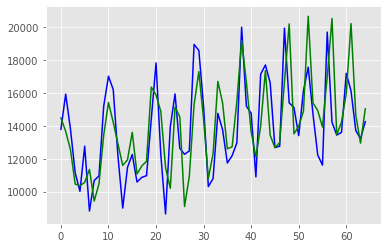

In [105]:
#   График с результатами

#   numpy.arange([start, ]stop, [step, ]dtype=None)¶


x2 = numpy.arange(0, 65, 1)

x3 = numpy.arange(65, 70, 1)


plt.plot(x2, y_train, color='blue')

plt.plot(x2, predictions_train, color='green')

# plt.plot(x3, predictions, color='red')

# plt.plot(x3, y_test, color='blue')





Попробовать улучшить модель.

можно кол-во нейронов изменить, или шаг уменьшить/увеличить
убрать центральную часть 
с параметрами с activation, optimizer

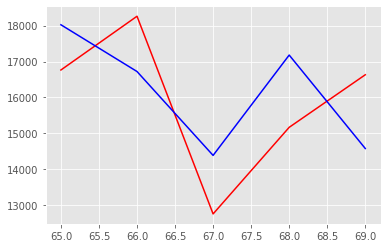

In [106]:
plt.plot(x3, predictions, color='red')
plt.plot(x3, y_test, color='blue')